## 3.2. Logistic Regression

In [23]:
import pandas as pd
import numpy as np

In [24]:
train_data=pd.read_csv('final_train_data_StdSc.csv')
test_data=pd.read_csv('final_test_data_StdSc.csv')

In [25]:
train_data_all=train_data.drop(['msno','is_churn','Unnamed: 0'],axis=1)#this dataset shouldn't include msno and in_churn
train_target=train_data['is_churn']

In [26]:
print(train_data_all.shape)
print(train_target.shape)

(70598, 154)
(70598,)


In [27]:
print(train_data_all.head())
print(train_target.head())

         bd  num_25_sum  num_50_sum  num_75_sum  num_985_sum  num_100_sum  \
0  1.005242    1.447979    1.855278    2.181346     1.498299     4.279500   
1  1.067876    1.812864    0.403297    0.338342     0.218478     1.165877   
2 -0.811134    0.691709    2.526819    1.119776     0.976891     0.145719   
3  1.130510   -0.669986   -0.476966   -0.413604    -0.563636    -0.450727   
4 -0.811134    1.466325    1.773604    0.367830     0.254028    -0.497478   

   num_unq_sum  num_totalsec_sum  num_25_mean  num_50_mean        ...          \
0     4.180203          4.400011     0.677988     0.887971        ...           
1     1.489773          1.256013     1.233600    -0.025824        ...           
2     0.624301          0.297107     0.118161     1.404949        ...           
3    -0.443168         -0.440912    -0.749262    -0.341240        ...           
4     0.216546         -0.404540     1.081068     1.258413        ...           

    city_21   city_22  gender_0  gender_1  gender_

In [28]:
test_data.columns

Index(['Unnamed: 0', 'bd', 'num_25_sum', 'num_50_sum', 'num_75_sum',
       'num_985_sum', 'num_100_sum', 'num_unq_sum', 'num_totalsec_sum',
       'num_25_mean',
       ...
       'gender_0', 'gender_1', 'gender_2', 'registered_via_3',
       'registered_via_4', 'registered_via_7', 'registered_via_9',
       'registered_via_13', 'msno', 'is_churn'],
      dtype='object', length=157)

In [29]:
test_target=test_data['is_churn']
test_data=test_data.drop(['msno','is_churn','Unnamed: 0'],axis=1)#this dataset shouldn't include msno and in_churn
print(test_target.shape)
print(test_data.shape)

(262843,)
(262843, 154)


In [30]:
print(test_target.head())
print(test_data.head())

0    0
1    0
2    0
3    0
4    0
Name: is_churn, dtype: int64
         bd  num_25_sum  num_50_sum  num_75_sum  num_985_sum  num_100_sum  \
0 -0.840527   -0.522259   -0.602739   -0.584220    -0.377952    -0.114536   
1  0.792488   -0.581050   -0.640079   -0.575303    -0.433727    -0.338979   
2 -0.840527    2.572062    0.634802    1.011987     0.525592     1.136128   
3  1.106529   -0.337487   -0.261348   -0.236443    -0.271981    -0.261964   
4  1.671803   -0.207907   -0.111990   -0.067013     0.034778    -0.332928   

   num_unq_sum  num_totalsec_sum  num_25_mean  num_50_mean        ...          \
0    -0.192430         -0.146375    -0.703467    -0.759848        ...           
1    -0.497846         -0.337333    -0.665328    -0.703208        ...           
2     1.511263          1.035867     1.827277     0.159349        ...           
3    -0.285715         -0.268519    -0.503196    -0.407678        ...           
4    -0.290694         -0.320169    -0.297483    -0.177535        ..

In [31]:
#writing the functions
import statsmodels.api as sm
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.metrics import roc_auc_score

In [32]:
#Metrics on Test
def confusion_matrix_report(y_true, y_pred):
    cm, labels = confusion_matrix(y_true, y_pred), unique_labels(y_true, y_pred)
    column_width = max([len(str(x)) for x in labels] + [5])  # 5 is value length
    report = " " * column_width + " " + "{:_^{}}".format("Prediction", column_width * len(labels))+ "\n"
    report += " " * column_width + " ".join(["{:>{}}".format(label, column_width) for label in labels]) + "\n"
    for i, label1 in enumerate(labels):
        report += "{:>{}}".format(label1, column_width) + " ".join(["{:{}d}".format(cm[i, j], column_width) for j in range(len(labels))]) + "\n"
    return report

def loggloss(target_test, model, data_test):
    probabilities=model.predict_proba(data_test)
    value=log_loss(target_test, probabilities)
    return value
    
def AUC(target_test, model, data_test):
    values=model.predict_proba(data_test)[:,1]
    auc_score=roc_auc_score(target_test, values)
    return auc_score
    
def analytics(target_test, model, data_test):#target of the test data #predictions as 0,1 #model (knnclassifier) #data_test
    y_pred=model.predict(data_test)
    print("Confusion Matrix:")
    print(confusion_matrix_report(target_test,y_pred))
    print("Accuracy Score:")
    print(accuracy_score(target_test,y_pred))
    print("Classification Report:")
    print(classification_report(target_test,y_pred))
    print("Log Loss:")
    print(loggloss(target_test, model, data_test))
    print("AUC Score:")
    print(AUC(target_test, model, data_test))

In [33]:
#special functions for logistic regression
import statsmodels.api as sm
from sklearn import linear_model
from sklearn import preprocessing

def stat_logit(data_target,data_indepen):
    logit_model=sm.Logit(data_target,data_indepen)
    result=logit_model.fit()
    return print(result.summary())

def train_logistic_regression(data_target,data_indepen):
    # Initialize logistic regression model
    log_model = linear_model.LogisticRegression()
    # Train the model
    log_model.fit(X =data_indepen,y = data_target)
    return log_model

### 3.2.1. Logistic modeling with all variables

In [34]:
stat_logit(train_target,train_data_all)

         Current function value: 0.408385
         Iterations: 35


C:\Users\Bengi\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Bengi\Anaconda3\lib\site-packages\statsmodels\base\model.py:1029: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(self.cov_params()))
C:\Users\Bengi\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Bengi\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Bengi\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


                           Logit Regression Results                           
Dep. Variable:               is_churn   No. Observations:                70598
Model:                          Logit   Df Residuals:                    70459
Method:                           MLE   Df Model:                          138
Date:                Thu, 30 Nov 2017   Pseudo R-squ.:                  0.4108
Time:                        12:17:19   Log-Likelihood:                -28831.
converged:                      False   LL-Null:                       -48935.
                                        LLR p-value:                     0.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
bd                                    0.0149      0.023      0.632      0.527      -0.031       0.061
num_25_sum                            0.0351    2.4e+05   1.46

In [35]:
log_model_1=train_logistic_regression(train_target,train_data_all)
analytics(test_target, log_model_1, test_data)

Confusion Matrix:
      Prediction
         0     1
    0218998 26552
    1 1433 15860

Accuracy Score:
0.893529597516
Classification Report:
             precision    recall  f1-score   support

          0       0.99      0.89      0.94    245550
          1       0.37      0.92      0.53     17293

avg / total       0.95      0.89      0.91    262843

Log Loss:
0.267962595211
AUC Score:
0.954283851469


In [36]:
y_score_model1=log_model_1.predict_proba(test_data)[:,1]
test_data['model1']=y_score_model1

### 3.2.2. Logistic modeling with all selected variables

In [37]:
#logistic modeling with prechoosen variables
data_indepen_m2=train_data_all[['number_of_days_201702_listened','is_auto_renew','total_cancel','active_days','avg_actual_amount_paid','most_fq_payment_method_id','num_75_mean','number_of_days_listened','num_25_201702_sum','num_50_201702_sum','num_100_201702_sum','num_25_201702_mean','num_50_201702_mean','num_totalsec_lasttwo_mean','total_churn','registered_via_3','registered_via_4','registered_via_7','bd','num_totalsec_sum','num_100_med','num_25_max','num_unq_max','num_totalsec_max','num_totalsec_min','num_985_201702_sum','num_75_201702_mean','num_unq_201702_mean','num_unq_201701_sum','num_25_201612_mean','num_100_201612_mean','num_75_lasttwo_mean','num_50_lastthree_mean','proportion_songs_above_50','registered_via_9']]
stat_logit(train_target,data_indepen_m2)

Optimization terminated successfully.
         Current function value: 0.409790
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               is_churn   No. Observations:                70598
Model:                          Logit   Df Residuals:                    70563
Method:                           MLE   Df Model:                           34
Date:                Thu, 30 Nov 2017   Pseudo R-squ.:                  0.4088
Time:                        12:17:46   Log-Likelihood:                -28930.
converged:                       True   LL-Null:                       -48935.
                                        LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
number_of_days_201702_listened    -0.9042      0.028    -31.990     

In [38]:
log_model_2=train_logistic_regression(train_target,data_indepen_m2)

In [39]:
test_data_m2=test_data[['number_of_days_201702_listened','is_auto_renew','total_cancel','active_days','avg_actual_amount_paid','most_fq_payment_method_id','num_75_mean','number_of_days_listened','num_25_201702_sum','num_50_201702_sum','num_100_201702_sum','num_25_201702_mean','num_50_201702_mean','num_totalsec_lasttwo_mean','total_churn','registered_via_3','registered_via_4','registered_via_7','bd','num_totalsec_sum','num_100_med','num_25_max','num_unq_max','num_totalsec_max','num_totalsec_min','num_985_201702_sum','num_75_201702_mean','num_unq_201702_mean','num_unq_201701_sum','num_25_201612_mean','num_100_201612_mean','num_75_lasttwo_mean','num_50_lastthree_mean','proportion_songs_above_50','registered_via_9']]

In [40]:
analytics(test_target, log_model_2, test_data_m2)

Confusion Matrix:
      Prediction
         0     1
    0218856 26694
    1 1463 15830

Accuracy Score:
0.892875214482
Classification Report:
             precision    recall  f1-score   support

          0       0.99      0.89      0.94    245550
          1       0.37      0.92      0.53     17293

avg / total       0.95      0.89      0.91    262843

Log Loss:
0.26891897735
AUC Score:
0.9538704791


In [42]:
y_score_model2=log_model_2.predict_proba(test_data_m2)[:,1]
test_data['model2']=y_score_model2

### 3.2.3. Logistic Modeling- Dropping insignificant variables from all

In [43]:
data_indepen_m3=data_indepen_m2.drop([
'num_50_201702_sum',
'num_25_201702_mean',                
'num_50_201702_mean',               
'num_totalsec_lasttwo_mean',        
'registered_via_7',                   
'bd',                                
'num_25_max',                        
'num_unq_max',                       
'num_totalsec_max',                  
'num_totalsec_min',                  
'num_985_201702_sum',                
'num_75_201702_mean',                
'num_unq_201701_sum',
'num_100_201612_mean',
'proportion_songs_above_50'],axis=1)
stat_logit(train_target,data_indepen_m3)

Optimization terminated successfully.
         Current function value: 0.409952
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               is_churn   No. Observations:                70598
Model:                          Logit   Df Residuals:                    70578
Method:                           MLE   Df Model:                           19
Date:                Thu, 30 Nov 2017   Pseudo R-squ.:                  0.4086
Time:                        12:19:13   Log-Likelihood:                -28942.
converged:                       True   LL-Null:                       -48935.
                                        LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
number_of_days_201702_listened    -0.9312      0.027    -34.843     

In [44]:
log_model_3=train_logistic_regression(train_target,data_indepen_m3)
test_data_m3=test_data_m2.drop(['num_50_201702_sum',
'num_25_201702_mean',                
'num_50_201702_mean',               
'num_totalsec_lasttwo_mean',        
'registered_via_7',                   
'bd',                                
'num_25_max',                        
'num_unq_max',                       
'num_totalsec_max',                  
'num_totalsec_min',                  
'num_985_201702_sum',                
'num_75_201702_mean',                
'num_unq_201701_sum',
'num_100_201612_mean',
'proportion_songs_above_50'],axis=1)
analytics(test_target, log_model_3, test_data_m3)

Confusion Matrix:
      Prediction
         0     1
    0218988 26562
    1 1495 15798

Accuracy Score:
0.893255669734
Classification Report:
             precision    recall  f1-score   support

          0       0.99      0.89      0.94    245550
          1       0.37      0.91      0.53     17293

avg / total       0.95      0.89      0.91    262843

Log Loss:
0.269674806882
AUC Score:
0.953717558772


In [45]:
y_score_model3=log_model_3.predict_proba(test_data_m3)[:,1]
test_data['model3']=y_score_model3

### 3.2.4. Logistic Modeling-Choose 4 Ranked Features

In [46]:
data_indepen_m4=train_data_all[['number_of_days_201702_listened',
'is_auto_renew',
'total_cancel',
'active_days',
'avg_actual_amount_paid'
]]
stat_logit(train_target,data_indepen_m4)

Optimization terminated successfully.
         Current function value: 0.419724
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               is_churn   No. Observations:                70598
Model:                          Logit   Df Residuals:                    70593
Method:                           MLE   Df Model:                            4
Date:                Thu, 30 Nov 2017   Pseudo R-squ.:                  0.3945
Time:                        12:19:28   Log-Likelihood:                -29632.
converged:                       True   LL-Null:                       -48935.
                                        LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
number_of_days_201702_listened    -0.3257      0.010    -31.103     

In [47]:
log_model_4=train_logistic_regression(train_target,data_indepen_m4)
test_data_m4=test_data[['number_of_days_201702_listened',
'is_auto_renew',
'total_cancel',
'active_days',
'avg_actual_amount_paid']]
analytics(test_target, log_model_4, test_data_m4)

Confusion Matrix:
      Prediction
         0     1
    0216585 28965
    1 1369 15924

Accuracy Score:
0.884592703629
Classification Report:
             precision    recall  f1-score   support

          0       0.99      0.88      0.93    245550
          1       0.35      0.92      0.51     17293

avg / total       0.95      0.88      0.91    262843

Log Loss:
0.290114739573
AUC Score:
0.947698380034


In [48]:
y_score_model4=log_model_4.predict_proba(test_data_m4)[:,1]
test_data['model4']=y_score_model4

### 3.2.5 Logistic modeling with 4 and 3 ranked variables

In [49]:
data_indepen_m5=train_data_all[['number_of_days_201702_listened',
'is_auto_renew',
'total_cancel',
'active_days',
'avg_actual_amount_paid',
'most_fq_payment_method_id'
]]
stat_logit(train_target,data_indepen_m5)

Optimization terminated successfully.
         Current function value: 0.419292
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               is_churn   No. Observations:                70598
Model:                          Logit   Df Residuals:                    70592
Method:                           MLE   Df Model:                            5
Date:                Thu, 30 Nov 2017   Pseudo R-squ.:                  0.3951
Time:                        12:19:41   Log-Likelihood:                -29601.
converged:                       True   LL-Null:                       -48935.
                                        LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
number_of_days_201702_listened    -0.3242      0.010    -30.924     

In [50]:
log_model_5=train_logistic_regression(train_target,data_indepen_m5)
test_data_m5=test_data[['number_of_days_201702_listened',
'is_auto_renew',
'total_cancel',
'active_days',
'avg_actual_amount_paid',
'most_fq_payment_method_id']]
analytics(test_target, log_model_5, test_data_m5)

Confusion Matrix:
      Prediction
         0     1
    0216857 28693
    1 1375 15918

Accuracy Score:
0.885604714601
Classification Report:
             precision    recall  f1-score   support

          0       0.99      0.88      0.94    245550
          1       0.36      0.92      0.51     17293

avg / total       0.95      0.89      0.91    262843

Log Loss:
0.28846621317
AUC Score:
0.948085725603


In [51]:
y_score_model5=log_model_5.predict_proba(test_data_m5)[:,1]
test_data['model5']=y_score_model5

### 3.2.6. Logistic Model with 2,3,4th ranked variables

In [52]:
data_indepen_m6=train_data_all[['number_of_days_201702_listened',
'is_auto_renew',
'total_cancel',
'active_days',
'avg_actual_amount_paid',
'most_fq_payment_method_id',
'num_75_mean',
'number_of_days_listened',
'num_25_201702_sum',
'num_50_201702_sum',
'num_100_201702_sum',
'num_25_201702_mean',
'num_50_201702_mean',
'num_totalsec_lasttwo_mean',
'total_churn',
'registered_via_3',
'registered_via_4',
'registered_via_7']]
stat_logit(train_target,data_indepen_m6)

Optimization terminated successfully.
         Current function value: 0.410587
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               is_churn   No. Observations:                70598
Model:                          Logit   Df Residuals:                    70580
Method:                           MLE   Df Model:                           17
Date:                Thu, 30 Nov 2017   Pseudo R-squ.:                  0.4076
Time:                        12:19:57   Log-Likelihood:                -28987.
converged:                       True   LL-Null:                       -48935.
                                        LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
number_of_days_201702_listened    -0.8830      0.026    -34.130     

In [53]:
log_model_6=train_logistic_regression(train_target,data_indepen_m6)
test_data_m6=test_data[['number_of_days_201702_listened',
'is_auto_renew',
'total_cancel',
'active_days',
'avg_actual_amount_paid',
'most_fq_payment_method_id',
'num_75_mean',
'number_of_days_listened',
'num_25_201702_sum',
'num_50_201702_sum',
'num_100_201702_sum',
'num_25_201702_mean',
'num_50_201702_mean',
'num_totalsec_lasttwo_mean',
'total_churn',
'registered_via_3',
'registered_via_4',
'registered_via_7']]
analytics(test_target, log_model_6, test_data_m6)

Confusion Matrix:
      Prediction
         0     1
    0218866 26684
    1 1462 15831

Accuracy Score:
0.892917064559
Classification Report:
             precision    recall  f1-score   support

          0       0.99      0.89      0.94    245550
          1       0.37      0.92      0.53     17293

avg / total       0.95      0.89      0.91    262843

Log Loss:
0.27007172725
AUC Score:
0.953804352176


In [54]:
y_score_model6=log_model_6.predict_proba(test_data_m6)[:,1]
test_data['model6']=y_score_model6

### 3.2.7. Logistic Model with RFE Selected Variables

In [55]:
data_indepen_m7=train_data_all[['number_of_days_listened','num_totalsec_201702_sum','num_totalsec_201702_mean','number_of_days_201702_listened','num_unq_201701_sum','number_of_days_201701_listened','num_unq_lasttwo_sum','num_100_lasttwo_mean','num_totalsec_lasttwo_mean','number_of_days_lasttwo_listened','number_of_days_lastthree_listened','most_fq_payment_method_id','is_auto_renew','total_cancel','active_days','avg_plan_list_price','avg_actual_amount_paid','registered_via_3','registered_via_4','registered_via_9']]
stat_logit(train_target,data_indepen_m7)

Optimization terminated successfully.
         Current function value: 0.410114
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               is_churn   No. Observations:                70598
Model:                          Logit   Df Residuals:                    70578
Method:                           MLE   Df Model:                           19
Date:                Thu, 30 Nov 2017   Pseudo R-squ.:                  0.4083
Time:                        12:20:13   Log-Likelihood:                -28953.
converged:                       True   LL-Null:                       -48935.
                                        LLR p-value:                     0.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
number_of_days_listened               0.8440      0.037     23

In [56]:
log_model_7=train_logistic_regression(train_target,data_indepen_m7)
test_data_m7=test_data[['number_of_days_listened','num_totalsec_201702_sum','num_totalsec_201702_mean','number_of_days_201702_listened','num_unq_201701_sum','number_of_days_201701_listened','num_unq_lasttwo_sum','num_100_lasttwo_mean','num_totalsec_lasttwo_mean','number_of_days_lasttwo_listened','number_of_days_lastthree_listened','most_fq_payment_method_id','is_auto_renew','total_cancel','active_days','avg_plan_list_price','avg_actual_amount_paid','registered_via_3','registered_via_4','registered_via_9']]
analytics(test_target, log_model_7, test_data_m7)

Confusion Matrix:
      Prediction
         0     1
    0218878 26672
    1 1436 15857

Accuracy Score:
0.893061637555
Classification Report:
             precision    recall  f1-score   support

          0       0.99      0.89      0.94    245550
          1       0.37      0.92      0.53     17293

avg / total       0.95      0.89      0.91    262843

Log Loss:
0.268801623459
AUC Score:
0.953859049727


In [57]:
y_score_model7=log_model_7.predict_proba(test_data_m7)[:,1]
test_data['model7']=y_score_model7

### 3.2.8. Logistic Model with Grid Search using RFE

In [59]:
# GridSearch: tunning parameter
temp = train_target.reshape(-1,1)
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
lr=linear_model.LogisticRegression()
parameters = {'penalty': ['l1','l2'], 'C': [0.001,0.01,0.1,1,10,100,1000]}
model_lr = GridSearchCV(lr, parameters, scoring='neg_log_loss',cv=5) #focusing on minimizing log loss metric
model_lr.fit(data_indepen_m7,train_target)
print(model_lr.best_params_)

C:\Users\Bengi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


{'C': 10, 'penalty': 'l2'}


In [67]:
model_lr.best_estimator_

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [60]:
analytics(test_target, model_lr, test_data_m7)

Confusion Matrix:
      Prediction
         0     1
    0218890 26660
    1 1434 15859

Accuracy Score:
0.893114901291
Classification Report:
             precision    recall  f1-score   support

          0       0.99      0.89      0.94    245550
          1       0.37      0.92      0.53     17293

avg / total       0.95      0.89      0.91    262843

Log Loss:
0.268754885813
AUC Score:
0.953854730198


In [61]:
y_score_model8=model_lr.predict_proba(test_data_m7)[:,1]
test_data['model8']=y_score_model8

### ROC Curve of Logistic Regression

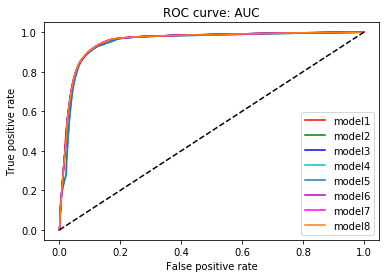

In [64]:
#ROC curve
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib 
from matplotlib import cm
import matplotlib.pyplot as plt
import random
i=0
n=8#number of models
col=test_data.columns
p=154#column where the first model columns start
colors=["r", "g", "b","c","C0","m","fuchsia","C1"]
#colors = cm.rainbow(np.linspace(0,1,n)) #make sure that this equal to your number of models
while(i<n):
    value=test_data.iloc[:,p]
    label=col[p]
    fpr_rf, tpr_rf, _ = roc_curve(test_target,value)
    auc_score=roc_auc_score(test_target, value)
    plt.plot(fpr_rf, tpr_rf, color=colors[i],label=label)
    i=i+1
    p=p+1
    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve: AUC')
plt.legend()
plt.show()

In [65]:
#Taking the chosen product_proba
y_score_model8=model_lr.predict_proba(test_data_m7)

In [66]:
np.savetxt("proba_best_logistic_reg.csv",y_score_model8)